In [1]:
import pandas as pd
import numpy as np
from neuralforecast import NeuralForecast
from neuralforecast.models import Autoformer, PatchTST
import matplotlib.pyplot as plt

# Load and preprocess your dataset
Y_df = pd.read_csv('../data/average_weekly_rating_messenger.csv')

# Ensure the 'ds' column is datetime
Y_df['ds'] = pd.to_datetime(Y_df.iloc[:, 0])

# Ensure the 'y' column is numeric and handle any non-numeric issues
Y_df['y'] = pd.to_numeric(Y_df.iloc[:, 1], errors='coerce')
Y_df.dropna(subset=['y'], inplace=True)  # Drop rows where 'y' is NaN after conversion

# Add unique_id as a constant value
Y_df['unique_id'] = 'rating'

# Keep only necessary columns
Y_df = Y_df[['unique_id', 'ds', 'y']]

# Check the DataFrame to confirm structure and types
print(Y_df.dtypes)  # 'unique_id' should be object, 'ds' datetime64, 'y' float64
print(Y_df.head())

# Set horizon to the number of future periods you'd like to forecast
horizon = 48  # Forecasting 48 weeks (around 1 year)

# Define the Informer model
models = [
    Autoformer(
        h=horizon,                 
        input_size=48,               
        max_steps=100,              
        val_check_steps=100,         
    ),
    PatchTST(
        h=horizon,                  
        input_size=48,               
        max_steps=100,              
        val_check_steps=100,        
    ),
]

# Initialize the NeuralForecast model with Informer
nf = NeuralForecast(
    models=models,
    freq='W'  # Weekly frequency for your dataset
)

# Fit the model on the dataset (training the model)
nf.fit(df=Y_df)

# Predict future values using the trained model (horizon is defined above)
Y_hat_future = nf.predict().reset_index(drop=True)

Seed set to 1
Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | enc_embedding | DataEmbedding | 384    | train
5 | dec_embedding | DataEmbedding | 384    | train
6 | encoder       | Encoder       | 148 K  | train
7 | decoder       | Decoder       | 141 K  | train
--------------------------------------------------------
290 K     Trainable params
0         Non-trainable params
290 K     Total params
1.162     Total estimated model params size (MB)
85        Modules in train mode
0         Modules in eval mode


unique_id            object
ds           datetime64[ns]
y                   float64
dtype: object
  unique_id         ds         y
0    rating 2020-01-05  3.759424
1    rating 2020-01-12  3.908879
2    rating 2020-01-19  3.899306
3    rating 2020-01-26  3.802771
4    rating 2020-02-02  3.748111


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_steps=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type              | Params | Mode 
-----------------------------------------------------------
0 | loss         | MAE               | 0      | train
1 | padder_train | ConstantPad1d     | 0      | train
2 | scaler       | TemporalNorm      | 0      | train
3 | model        | PatchTST_backbone | 437 K  | train
-----------------------------------------------------------
437 K     Trainable params
3         Non-trainable params
437 K     Total params
1.749     Total estimated model params size (MB)
90        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_steps=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                                 …

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                                 …

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\neuralforecast\core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


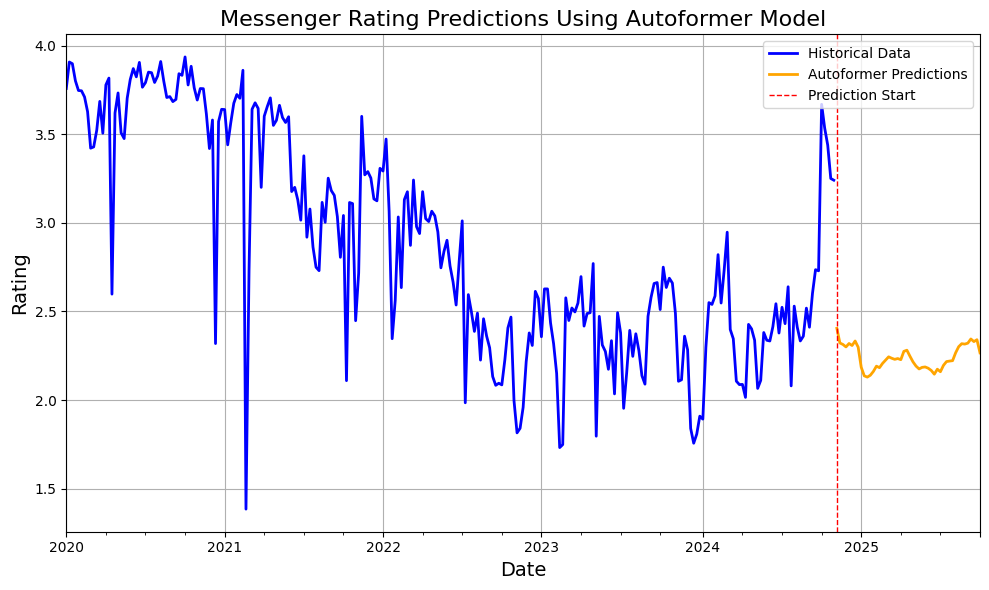

In [2]:
# Plot the results (both historical data and future predictions)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot historical data
Y_df.set_index('ds')['y'].plot(ax=ax, label='Historical Data', color='blue', linewidth=2)

# Plot future predictions
Y_hat_future.set_index('ds')['Autoformer'].plot(ax=ax, label='Autoformer Predictions', color='orange', linewidth=2)

# Predict zone
prediction_start_date = Y_hat_future['ds'].min() 
plt.axvline(x=prediction_start_date, color='red', linestyle='--', linewidth=1, label='Prediction Start')


# Formatting the plot
ax.set_title('Messenger Rating Predictions Using Autoformer Model', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Rating', fontsize=14)

ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()
plt.show()

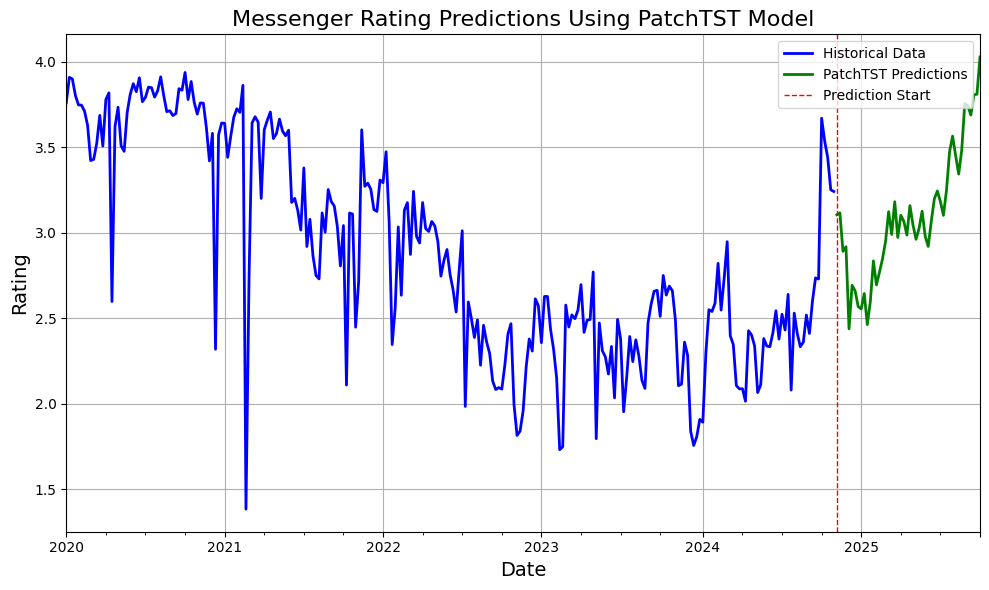

In [3]:
# Plot the results (both historical data and future predictions)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot historical data
Y_df.set_index('ds')['y'].plot(ax=ax, label='Historical Data', color='blue', linewidth=2)

# Plot future predictions
Y_hat_future.set_index('ds')['PatchTST'].plot(ax=ax, label='PatchTST Predictions', color='green', linewidth=2)

# Predict zone
prediction_start_date = Y_hat_future['ds'].min() 
plt.axvline(x=prediction_start_date, color='red', linestyle='--', linewidth=1, label='Prediction Start')


# Formatting the plot
ax.set_title('Messenger Rating Predictions Using PatchTST Model', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Rating', fontsize=14)

ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()
plt.show()

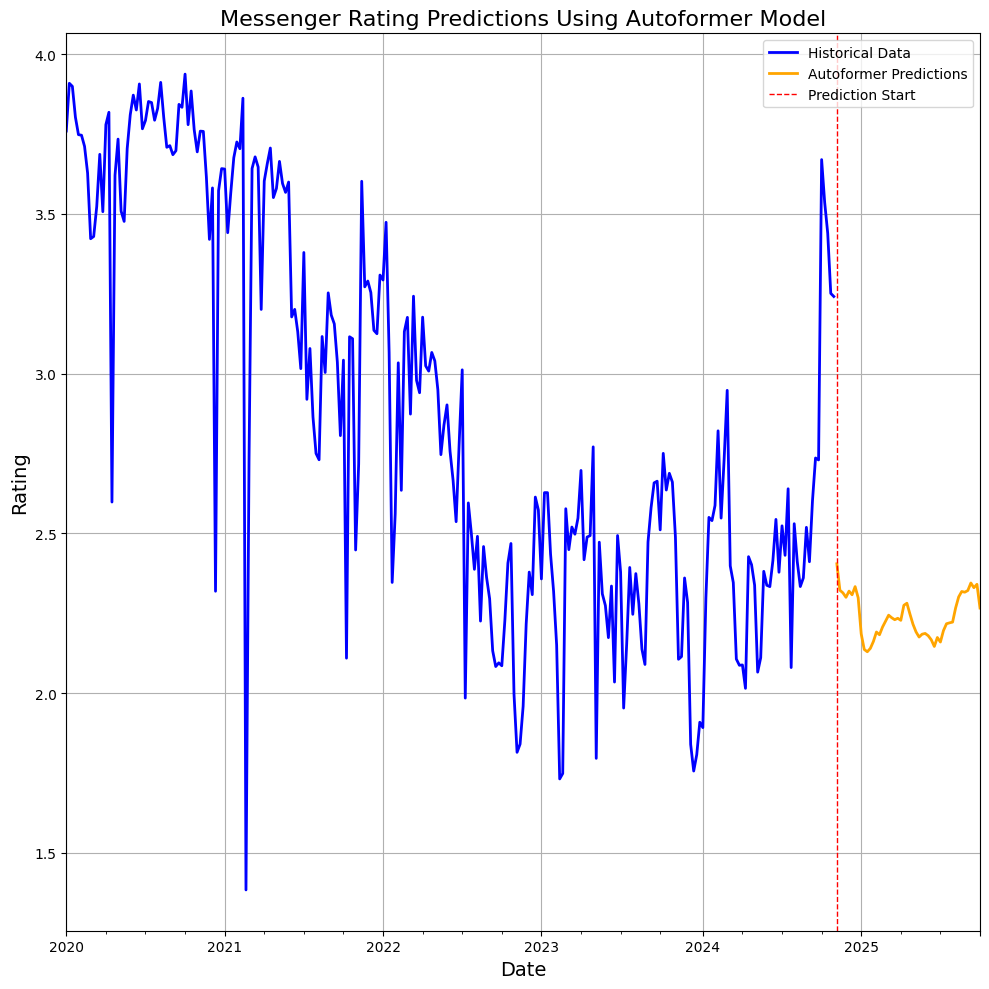

In [4]:
# Square plot for article
fig, ax = plt.subplots(figsize=(10, 10))
Y_df.set_index('ds')['y'].plot(ax=ax, label='Historical Data', color='blue', linewidth=2)
Y_hat_future.set_index('ds')['Autoformer'].plot(ax=ax, label='Autoformer Predictions', color='orange', linewidth=2)

prediction_start_date = Y_hat_future['ds'].min() 
plt.axvline(x=prediction_start_date, color='red', linestyle='--', linewidth=1, label='Prediction Start')

ax.set_title('Messenger Rating Predictions Using Autoformer Model', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Rating', fontsize=14)

ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()
plt.show()

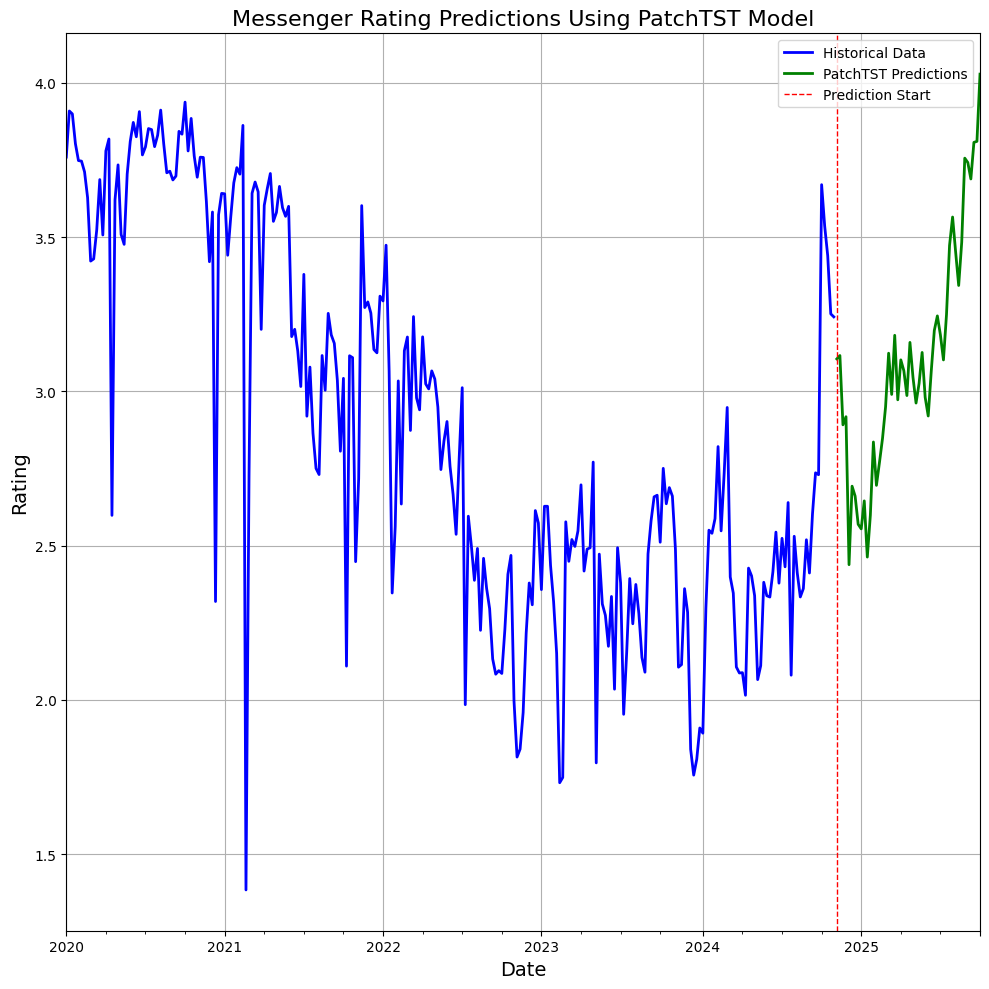

In [7]:
# Square plot for article
fig, ax = plt.subplots(figsize=(10, 10))
Y_df.set_index('ds')['y'].plot(ax=ax, label='Historical Data', color='blue', linewidth=2)
Y_hat_future.set_index('ds')['PatchTST'].plot(ax=ax, label='PatchTST Predictions', color='green', linewidth=2)

prediction_start_date = Y_hat_future['ds'].min() 
plt.axvline(x=prediction_start_date, color='red', linestyle='--', linewidth=1, label='Prediction Start')

ax.set_title('Messenger Rating Predictions Using PatchTST Model', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Rating', fontsize=14)

ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()
plt.show()